<a href="https://colab.research.google.com/github/Rayyaan23/Website-Traffic-Timeseries-Forecasting/blob/main/Website_Traffic_Timeseries_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install and Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For classic statistical models (ARIMA, decomposition, tests)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA

# For advanced ML approaches
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from prophet import Prophet   # for forecasting
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# For reproducibilty
np.random.seed(42)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
import pandas as pd

# Load traffic dataset
df = pd.read_csv("lacity.org-website-traffic.csv")

print(df.head())
print(df.info())


                      Date Device Category            Browser  # of Visitors  \
0  2014-01-01T00:00:00.000         desktop             Chrome            900   
1  2014-01-01T00:00:00.000         desktop            Firefox            692   
2  2014-01-01T00:00:00.000         desktop  Internet Explorer           1038   
3  2014-01-01T00:00:00.000         desktop              Opera             35   
4  2014-01-01T00:00:00.000         desktop             Safari            484   

   Sessions  Bounce Rate  
0       934      55.5675  
1       761      40.8673  
2      1107      31.2556  
3        35     100.0000  
4       554      24.9097  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348985 entries, 0 to 8348984
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date             object 
 1   Device Category  object 
 2   Browser          object 
 3   # of Visitors    int64  
 4   Sessions         int64  
 5   Bounce Rate      float64
dtype

In [ ]:
df.head(10)


,Date,Device Category,Browser,# of Visitors,Sessions,Bounce Rate
0,2014-01-01T00:00:00.000,desktop,Chrome,900,934,55.5675
1,2014-01-01T00:00:00.000,desktop,Firefox,692,761,40.8673
2,2014-01-01T00:00:00.000,desktop,Internet Explorer,1038,1107,31.2556
3,2014-01-01T00:00:00.000,desktop,Opera,35,35,100.0000
4,2014-01-01T00:00:00.000,desktop,Safari,484,554,24.9097
5,2014-01-01T00:00:00.000,mobile,Android Browser,242,311,89.0675
6,2014-01-01T00:00:00.000,mobile,Chrome,242,242,71.4876
7,2014-01-01T00:00:00.000,mobile,Internet Explorer,35,35,100.0000
8,2014-01-01T00:00:00.000,mobile,Safari,969,1038,60.0193
9,2014-01-01T00:00:00.000,mobile,Safari (in-app),35,35,100.0000


In [ ]:
df.describe()

,# of Visitors,Sessions,Bounce Rate
count,8.348985e+06,8.348985e+06,8.348985e+06
mean,6.150075e+02,6.899815e+02,5.246254e+01
std,9.586180e+02,1.093220e+03,3.215602e+01
min,3.500000e+01,3.500000e+01,0.000000e+00
25%,4.000000e+01,7.000000e+01,3.333330e+01
50%,2.190000e+02,2.370000e+02,5.000000e+01
75%,8.340000e+02,9.220000e+02,7.640620e+01
max,3.436500e+04,4.617200e+04,1.000000e+02


<Axes: >

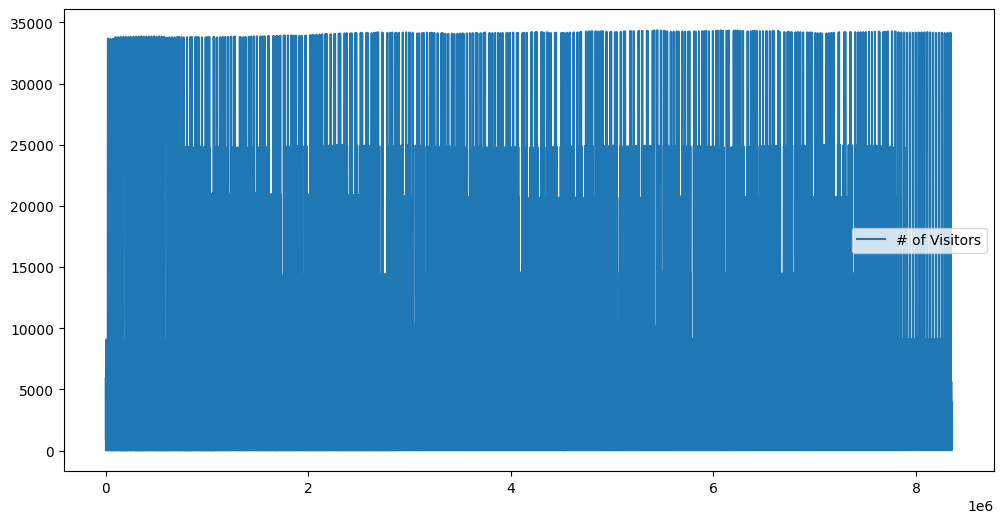

In [ ]:
df.plot(y='# of Visitors', figsize=(12,6))

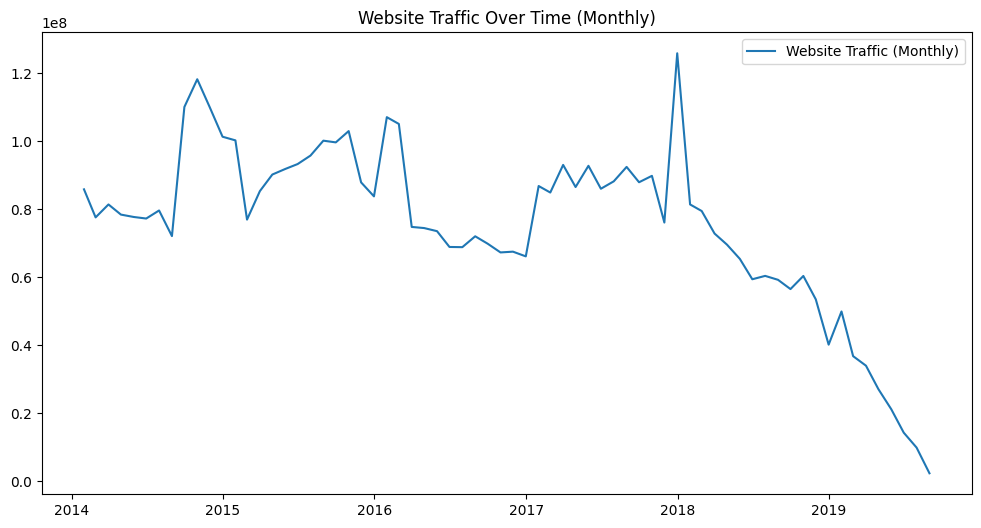

In [ ]:
# EDA(exploratory Data Analysis)

# Convert 'Date' to datetime and set as index if not already done
if not isinstance(df.index, pd.DatetimeIndex):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Resample (daily → monthly for example, depending on granularity)
df_monthly = df['# of Visitors'].resample('ME').sum()

plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Website Traffic (Monthly)')
plt.title("Website Traffic Over Time (Monthly)")
plt.legend()
plt.show()

In [ ]:
## Train - Test Split

train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[:train_size], df_monthly[train_size:]

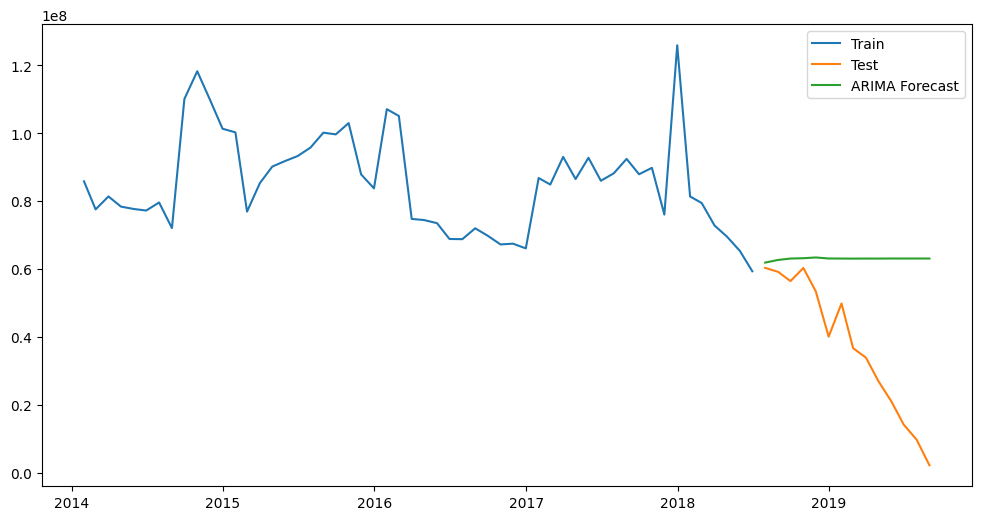

In [ ]:
# ===============================
# ARIMA Forecast
# ===============================
model = ARIMA(train, order=(5,1,0))   # Adjust p,d,q after ACF/PACF
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gsm6oo4/si7w3kg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gsm6oo4/67rt3omk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46079', 'data', 'file=/tmp/tmp6gsm6oo4/si7w3kg3.json', 'init=/tmp/tmp6gsm6oo4/67rt3omk.json', 'output', 'file=/tmp/tmp6gsm6oo4/prophet_modeltzkhkpku/prophet_model-20251002111211.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:12:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

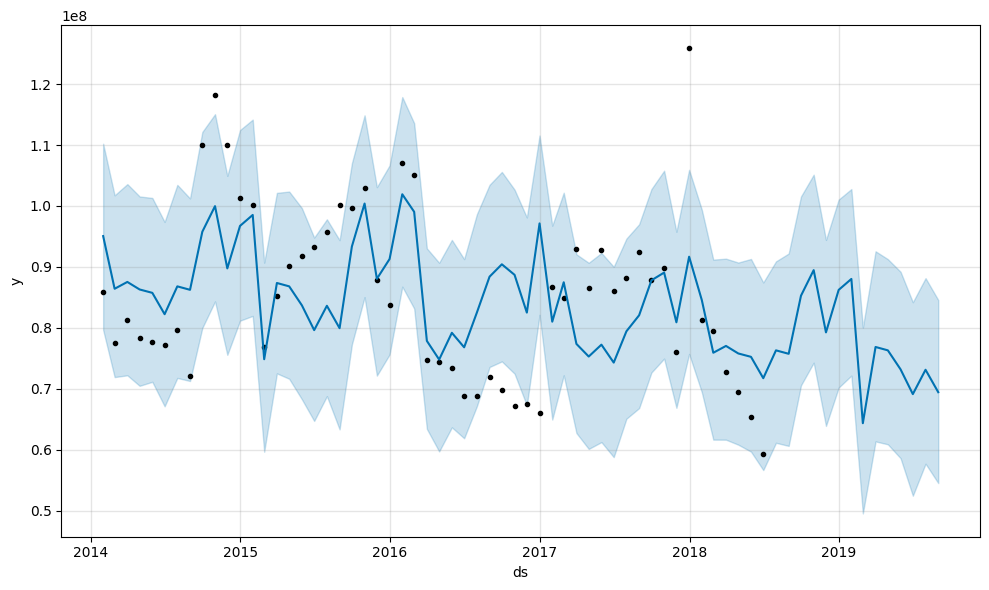

In [ ]:
# ===============================
# Prophet Forecast
# ===============================
prophet_df = df_monthly.reset_index()
prophet_df.columns = ['ds', 'y']  # Prophet requires ds, y

train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

m = Prophet()
m.fit(train_prophet)

future = m.make_future_dataframe(periods=len(test_prophet), freq='M')
forecast = m.predict(future)

fig = m.plot(forecast)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3668
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2341
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1204
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0351
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0184
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0517
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0546
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0289
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0160
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0147
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0198
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0238
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0235
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0170
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0182 
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━

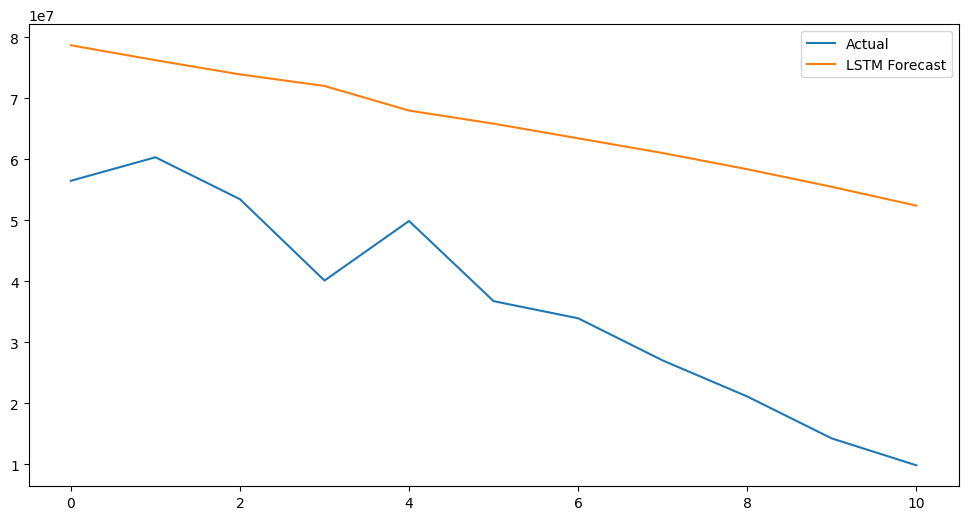

In [ ]:
# ===============================
# LSTM Forecast
# ===============================
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(df_monthly.values.reshape(-1,1))

# Prepare sequences
def create_dataset(series, time_step=12):
    X, y = [], []
    for i in range(len(series)-time_step-1):
        X.append(series[i:(i+time_step), 0])
        y.append(series[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_dataset(scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Forecast
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='LSTM Forecast')
plt.legend()
plt.show()


In [ ]:
##Compare Models

print("ARIMA MAE:", mean_absolute_error(test, forecast_arima))
print("Prophet MAE:", mean_absolute_error(test_prophet['y'], forecast['yhat'].iloc[-len(test):]))
print("LSTM MAE:", mean_absolute_error(y_test_actual, y_pred))


ARIMA MAE: 25522501.704947643
Prophet MAE: 39862090.238392636
LSTM MAE: 29301278.727272727


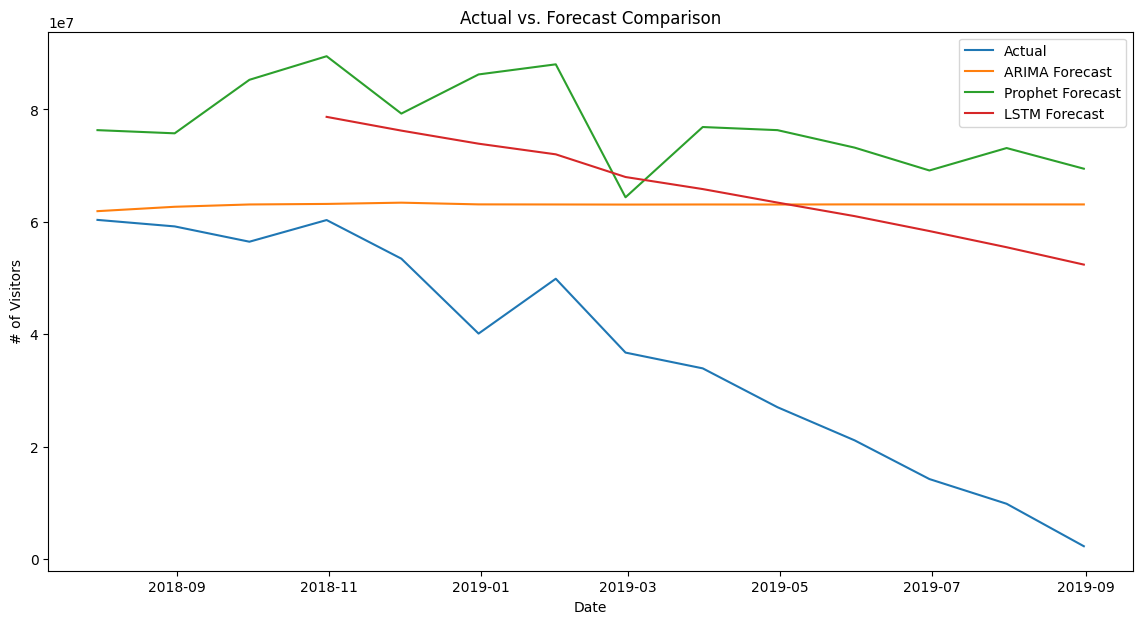

In [ ]:
# Visualize Actual vs. Forecast for all models
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast')

# Align Prophet forecast index with the test index for plotting
plt.plot(test.index, forecast['yhat'].iloc[-len(test):], label='Prophet Forecast')

# For LSTM, plot y_pred against the corresponding dates from the test index
plt.plot(test.index[-len(y_pred):], y_pred, label='LSTM Forecast')

plt.title('Actual vs. Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('# of Visitors')
plt.legend()
plt.show()